In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [22]:
import pandas as pd
df = pd.read_csv("/Users/mac/Desktop/MLT/MLT-07 - MLP and Backpropagation/bioresponse.csv")
df
X = df.drop('Activity', axis=1).to_numpy()
# features are all the columns except the target one.
y = df[['Activity']].to_numpy()
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(df,y,test_size=0.25, random_state=42)
X_train = X_train.T
X_test = X_test.T
y_train = y_train.T
y_test = y_test.T

In [23]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1./(1.+np.exp(-z))
    return s

In [24]:

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    w = np.zeros((dim,1))
    b = 0.
    
    return w, b

In [25]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size which equals the number of features
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    """
    m = X.shape[1]
    #print('number of objects = ',len(X))
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X)+b )                                 # compute activation
    cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1)   # compute cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1./m)*np.dot(X,(A-Y).T)
    db = (1./m)*np.sum(A-Y,axis=1)

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [26]:
def model(X_train, Y_train, X_test, Y_test, used_fun = gd_optimize, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function we've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array 
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array 
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs = used_fun(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [27]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities 
    A = sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if (A[0,i]<=0.5):
            Y_prediction[0][i]=0
        else:
            Y_prediction[0][i]=1
    
    return Y_prediction

In [47]:
def gd_optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """
    costs = []
    
    for iteration in range(num_iterations):
                
        # Cost and gradient calculation 
        grads, cost = propagate(w,b,X,Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w -=learning_rate*dw
        b -=learning_rate*db
        
        # Record the costs
        if iteration % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and iteration % 100 == 0:
            print ("Cost after iteration %i: %f" %(iteration, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [48]:
d = model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=1e-3, used_fun=gd_optimize , print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.675014
Cost after iteration 200: 0.662408
Cost after iteration 300: 0.650764
Cost after iteration 400: 0.639754
Cost after iteration 500: 0.629295
Cost after iteration 600: 0.619330
Cost after iteration 700: 0.609815
Cost after iteration 800: 0.600708
Cost after iteration 900: 0.591977
Cost after iteration 1000: 0.583593
Cost after iteration 1100: 0.575529
Cost after iteration 1200: 0.567764
Cost after iteration 1300: 0.560276
Cost after iteration 1400: 0.553047
Cost after iteration 1500: 0.546062
Cost after iteration 1600: 0.539304
Cost after iteration 1700: 0.532760
Cost after iteration 1800: 0.526418
Cost after iteration 1900: 0.520267
train accuracy: 88.30430145751866 %
test accuracy: 86.67377398720683 %


In [30]:
def sgd(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    costs = []
    for i in range(num_iterations):
        for j in range(X.shape[1]):
            # single sample
            x = X.iloc[:, j]
            x = x.to_numpy()
            x = x.reshape(x.shape[0], 1)
            y = Y[:, j]
            grads, cost = propagate(w, b, x, y)
            dw, db = grads["dw"], grads["db"]
            
            w -= learning_rate * dw
            b -= learning_rate * db
        grads, cost = propagate(w, b, X, Y)
        # record the costs
        if i % 100 == 0:
            costs.append(cost)
        # print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print('Cost after iteration %i: %f' % (i, cost))
    params = {"w": w,
                "b": b}
    grads = {"dw": dw,
                "db": db}
    return params, grads, costs

In [51]:
d2 = model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=1e-3, used_fun=sgd , print_cost=True)

Cost after iteration 0: 0.470134
Cost after iteration 100: 0.014614
Cost after iteration 200: 0.007256
Cost after iteration 300: 0.004819
Cost after iteration 400: 0.003606
Cost after iteration 500: 0.002880
Cost after iteration 600: 0.002398
Cost after iteration 700: 0.002054
Cost after iteration 800: 0.001796
Cost after iteration 900: 0.001595
Cost after iteration 1000: 0.001435
Cost after iteration 1100: 0.001304
Cost after iteration 1200: 0.001195
Cost after iteration 1300: 0.001103
Cost after iteration 1400: 0.001024
Cost after iteration 1500: 0.000956
Cost after iteration 1600: 0.000896
Cost after iteration 1700: 0.000843
Cost after iteration 1800: 0.000796
Cost after iteration 1900: 0.000754
train accuracy: 100.0 %
test accuracy: 100.0 %


In [32]:
def Adam(w, b, X, Y, num_iterations, learning_rate, print_cost=False, beta1=0.9, beta2=0.999, constant=1e-8):
    costs = []
    v_dw, v_db = 0,0
    m_dw, m_db = 0,0
    
    for iteration in range(num_iterations):        
        
        grads, cost = propagate(w,b,X,Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        
        m_dw = beta1*m_dw + (1-beta1)*dw
        # *** biases *** #
        m_db = beta1*m_db + (1-beta1)*db

        # beta 2
        # weight
        v_dw = beta2*v_dw + (1-beta2)*np.power(dw, 2)
        # bias
        v_db = beta2*v_db + (1-beta2)*np.power(db, 2)

        # bias correction
        m_dw_corr = m_dw/(1-beta1**iteration+1)
        m_db_corr = m_db/(1-beta1**iteration+1)
        v_dw_corr = v_dw/(1-beta2**iteration+1)
        v_db_corr = v_db/(1-beta2**iteration+1)

        # update weights and biases
        w -=  learning_rate*(m_dw_corr/(np.sqrt(v_dw_corr)+constant))
        b -=  learning_rate*(m_db_corr/(np.sqrt(v_db_corr)+constant))
        
        # Record the costs
        if iteration % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and iteration % 100 == 0:
            print ("Cost after iteration %i: %f" %(iteration, cost))
        
    params = {"w": w,
              "b": b}
    grads = {"dw": dw,
             "db": db}
    return params, grads, costs

In [53]:
d3 = model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=1e-3, used_fun=Adam , print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.397950
Cost after iteration 200: 0.347854
Cost after iteration 300: 0.317508
Cost after iteration 400: 0.295153
Cost after iteration 500: 0.277206
Cost after iteration 600: 0.262088
Cost after iteration 700: 0.248962
Cost after iteration 800: 0.237324
Cost after iteration 900: 0.226846
Cost after iteration 1000: 0.217303
Cost after iteration 1100: 0.208533
Cost after iteration 1200: 0.200414
Cost after iteration 1300: 0.192851
Cost after iteration 1400: 0.185771
Cost after iteration 1500: 0.179115
Cost after iteration 1600: 0.172835
Cost after iteration 1700: 0.166891
Cost after iteration 1800: 0.161249
Cost after iteration 1900: 0.155882
train accuracy: 97.01386420191966 %
test accuracy: 83.47547974413646 %


learning rate 0.0100
Gradient Descent
train accuracy: 99.4667614646285 %
test accuracy: 99.0405117270789 %
************
Stochastic Gradient Descent
train accuracy: 100.0 %
test accuracy: 100.0 %
************
Adam
train accuracy: 100.0 %
test accuracy: 98.50746268656717 %


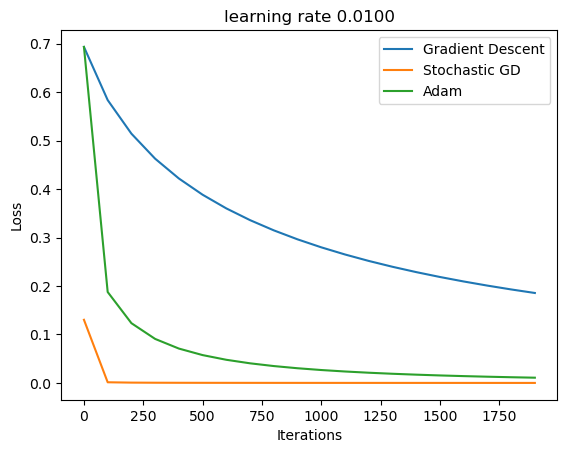

learning rate 0.0500
Gradient Descent
train accuracy: 100.0 %
test accuracy: 100.0 %
************
Stochastic Gradient Descent
train accuracy: 100.0 %
test accuracy: 100.0 %
************
Adam


/var/folders/6m/1kyq0wq56bx12x382j8hdw1h0000gq/T/ipykernel_19759/523028196.py:22: RuntimeWarning: divide by zero encountered in log
  cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1)   # compute cost
/var/folders/6m/1kyq0wq56bx12x382j8hdw1h0000gq/T/ipykernel_19759/523028196.py:22: RuntimeWarning: invalid value encountered in multiply
  cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1)   # compute cost


train accuracy: 100.0 %
test accuracy: 98.8272921108742 %


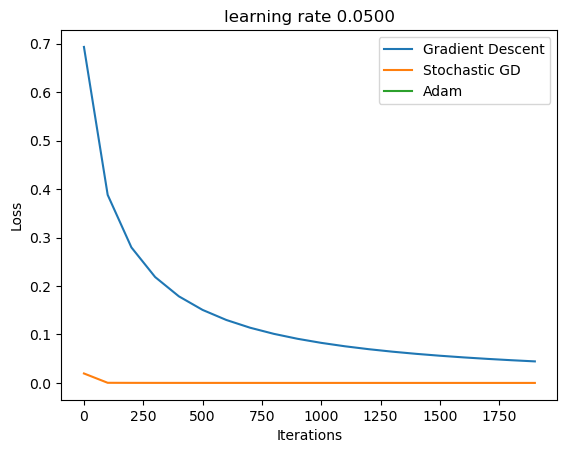

learning rate 0.0010
Gradient Descent
train accuracy: 88.30430145751866 %
test accuracy: 86.67377398720683 %
************
Stochastic Gradient Descent
train accuracy: 100.0 %
test accuracy: 100.0 %
************
Adam
train accuracy: 97.01386420191966 %
test accuracy: 83.47547974413646 %


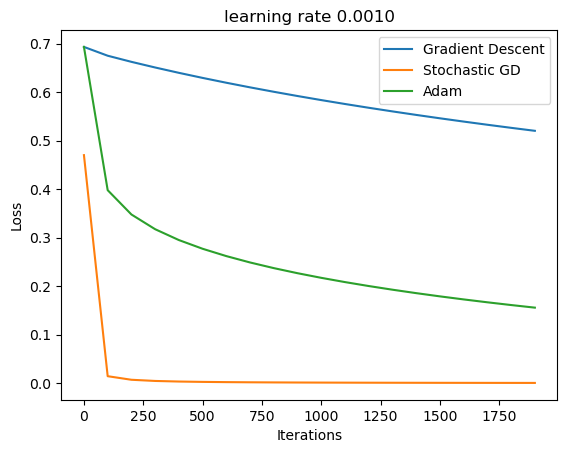

learning rate 0.0050
Gradient Descent
train accuracy: 96.58727337362247 %
test accuracy: 95.73560767590618 %
************
Stochastic Gradient Descent
train accuracy: 100.0 %
test accuracy: 100.0 %
************
Adam
train accuracy: 100.0 %
test accuracy: 95.3091684434968 %


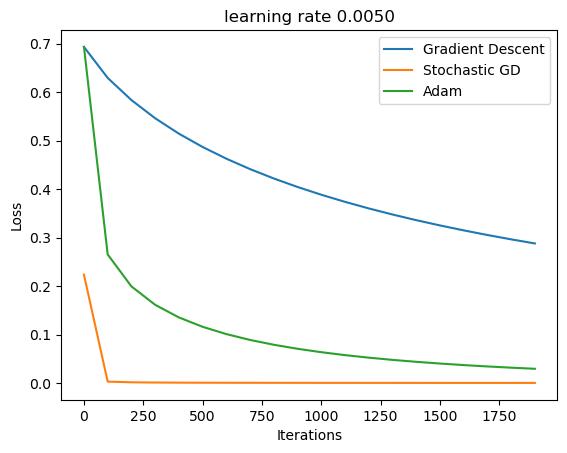

learning rate 0.0001
Gradient Descent
train accuracy: 59.971560611446854 %
test accuracy: 63.859275053304906 %
************
Stochastic Gradient Descent
train accuracy: 100.0 %
test accuracy: 100.0 %
************
Adam
train accuracy: 83.89619623178102 %
test accuracy: 78.03837953091684 %


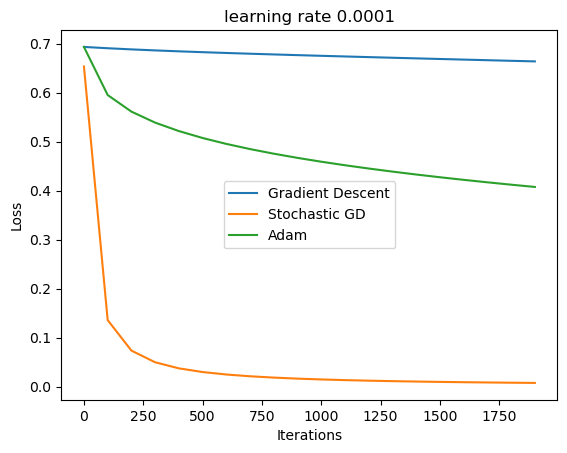

learning rate 0.0005
Gradient Descent
train accuracy: 82.47422680412372 %
test accuracy: 82.83582089552239 %
************
Stochastic Gradient Descent
train accuracy: 100.0 %
test accuracy: 100.0 %
************
Adam
train accuracy: 92.53466050479915 %
test accuracy: 81.34328358208955 %


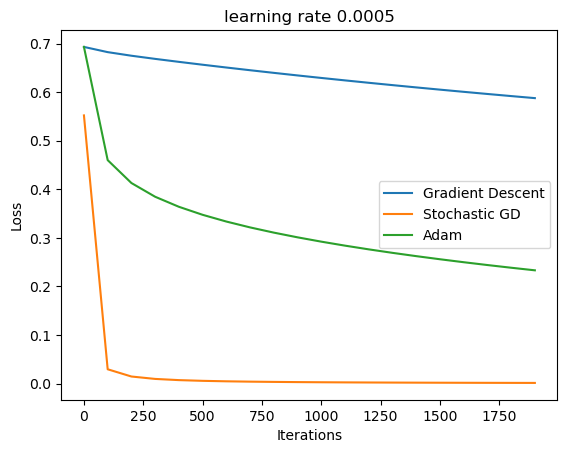

In [55]:
learning_rates = [0.01 , 0.05 , 0.001, 0.005 , 0.0001 , 0.0005]

for index in range(len(learning_rates)):
    print("learning rate %.4f"%(learning_rates[index]))
    print('Gradient Descent')
    gd_0_001 = model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=learning_rates[index], used_fun=gd_optimize , print_cost=False)
    print('************')
    print('Stochastic Gradient Descent')
    sgd_0_001 = model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=learning_rates[index], used_fun=sgd, print_cost=False)
    print('************')
    print('Adam')
    adam_0_001 = model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=learning_rates[index], used_fun=Adam, print_cost=False)
    range_iter = np.arange(gd_0_001['num_iterations'], step=100)
    plt.plot(range_iter, gd_0_001['costs'], label='Gradient Descent')
    plt.plot(range_iter, sgd_0_001['costs'], label='Stochastic GD')
    plt.plot(range_iter, adam_0_001['costs'], label='Adam')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title("learning rate %.4f"%(learning_rates[index]))
    plt.legend()
    plt.show() 
        

In [ ]:
# from graph , we can see that SGD > Adam > GD due to less iteration of minimizing the loss , but it takes much more 
# time to run SGD than other 2 algorithms . So if there is huge data to deal with , Adam could be a more speedy way to 
# but less accurary 